In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Load data

df_togo = pd.read_csv("../data/togo_clean.csv")
df_benin = pd.read_csv("../data/benin_clean.csv")
df_sierra = pd.read_csv("../data/sierraleone_clean.csv")

# Add Country labels

df_togo["Country"] = "Togo"
df_benin["Country"] = "Benin"
df_sierra["Country"] = "sierraleon"

# Combine all
df_all = pd.concat([df_togo, df_benin, df_sierra], ignore_index=True)

In [15]:
# Summary Comparison

summary = df_all.groupby("Country")[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', ]].mean().round(2)
print (summary)

            GHI     DNI     DHI   Tamb     RH    WS
Country                                            
Benin    240.56  167.19  115.36  28.18  54.49  2.12
Sierra   201.96  116.38  113.72  26.32  79.45  1.15
Togo     213.89  141.76  107.81  27.75  55.01  2.29


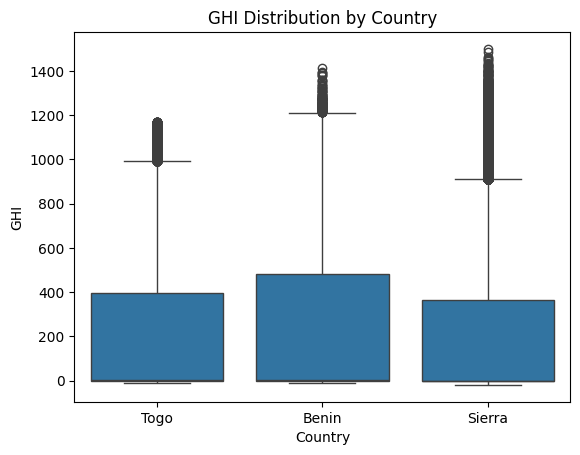

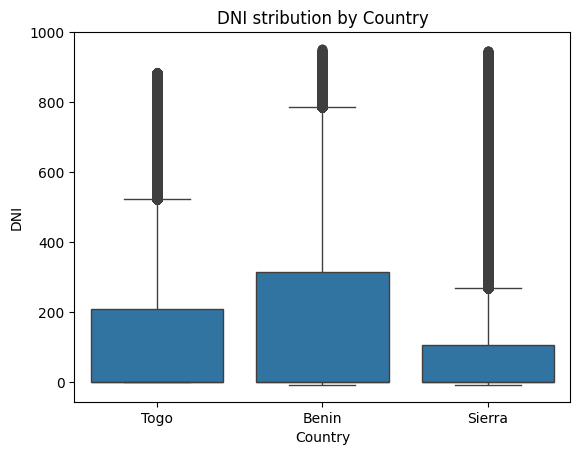

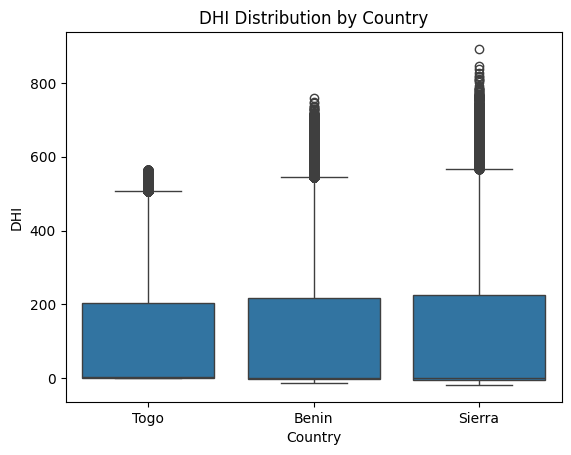

In [16]:
# Distribution Comparison

# GHI Boxplot
sns.boxplot(data=df_all, x='Country', y='GHI')
plt.title("GHI Distribution by Country")
plt.show()


# DNI xplot
sns.boxplot(data=df_all, x='Country', y='DNI')
plt.title("DNI stribution by Country")
plt.show()

# DHI Boxplot
sns.boxplot(data=df_all, x='Country', y='DHI')
plt.title("DHI Distribution by Country")
plt.show()


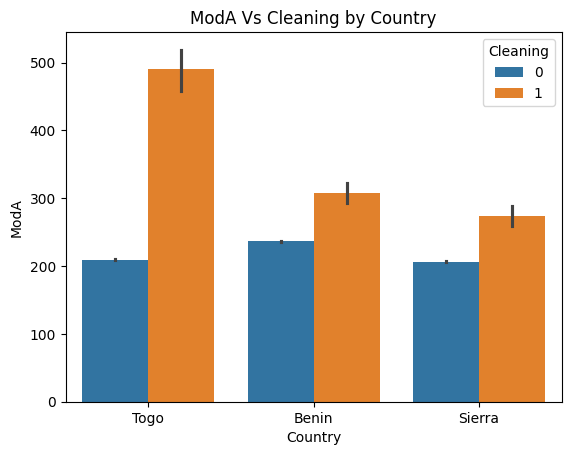

In [18]:
# CleanUp

sns.barplot(data = df_all, x="Country", y="ModA", hue="Cleaning")
plt.title("ModA Vs Cleaning by Country")
plt.show()

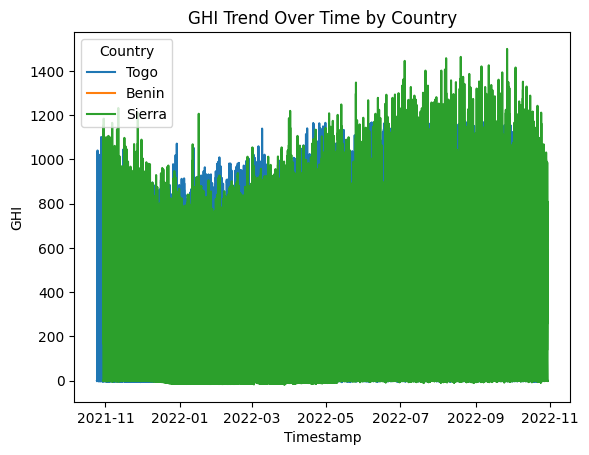

In [19]:
# Enivronmnet Trends

df_all['Timestamp'] = pd.to_datetime(df_all['Timestamp'])
sns.lineplot(data=df_all, x="Timestamp", y="GHI", hue="Country")
plt.title("GHI Trend Over Time by Country")
plt.show()

In [20]:
# Correlation Matrix

for c in df_all['Country'].unique():
    print(f"Correlation for {c}")
    print(df_all[df_all['Country'] == c][['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr())

Correlation for Togo
            GHI       DNI       DHI     TModA     TModB
GHI    1.000000  0.887201  0.860495  0.864377  0.882304
DNI    0.887201  1.000000  0.567031  0.747894  0.761946
DHI    0.860495  0.567031  1.000000  0.774226  0.790515
TModA  0.864377  0.747894  0.774226  1.000000  0.985069
TModB  0.882304  0.761946  0.790515  0.985069  1.000000
Correlation for Benin
            GHI       DNI       DHI     TModA     TModB
GHI    1.000000  0.882376  0.849989  0.920127  0.874338
DNI    0.882376  1.000000  0.546602  0.790340  0.756007
DHI    0.849989  0.546602  1.000000  0.825012  0.777829
TModA  0.920127  0.790340  0.825012  1.000000  0.983443
TModB  0.874338  0.756007  0.777829  0.983443  1.000000
Correlation for Sierra
            GHI       DNI       DHI     TModA     TModB
GHI    1.000000  0.869108  0.865815  0.923092  0.912260
DNI    0.869108  1.000000  0.536710  0.816449  0.808194
DHI    0.865815  0.536710  1.000000  0.808479  0.807551
TModA  0.923092  0.816449  0.808479  1

e:\kaim projec\Solar-Challege-Week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


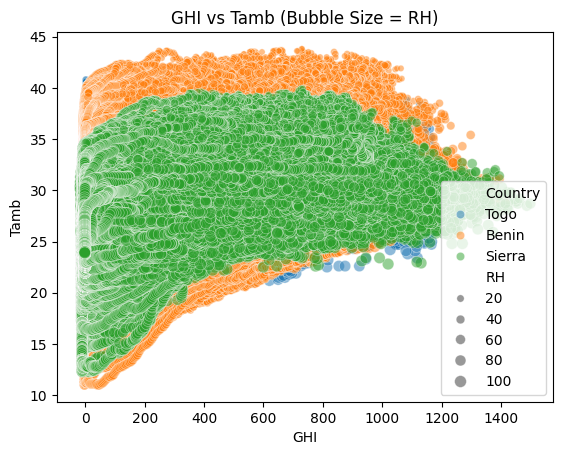

In [ ]:
# Bubble Chart Comparison.......

sns.scatterplot(data=df_all, x="GHI", y="Tamb", size="RH", hue="Country", alpha=0.5)
plt.title("GHI vs Tamb (Bubble Size = RH)")
plt.show()

In [ ]:
# save final comparison....

df_all.to_csv("../data/solar_combined.csv", index=False)